# Exploratory Data Analysis (EDA) for the Coronavirus 

In [3]:
# import the modules 

import os 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from shapely.geometry import Point 

In [10]:
# import our data as a single data frame ! 

path = './Data'

files = [files for files in os.listdir(path) if not files.startswith('README')]

df = pd.DataFrame()

for file in files:
    read = pd.read_csv(path+'/'+file)
    df = df.append(read)
    
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176


In [12]:
df.shape

(2964, 18)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        2964 non-null   object 
 1   Country_Region        2964 non-null   object 
 2   Last_Update           2783 non-null   object 
 3   Lat                   2846 non-null   float64
 4   Long_                 2846 non-null   float64
 5   Confirmed             2964 non-null   int64  
 6   Deaths                2964 non-null   int64  
 7   Recovered             2130 non-null   float64
 8   Active                2947 non-null   float64
 9   FIPS                  2783 non-null   float64
 10  Incident_Rate         2846 non-null   float64
 11  People_Tested         2688 non-null   float64
 12  People_Hospitalized   1842 non-null   float64
 13  Mortality_Rate        2896 non-null   float64
 14  UID                   2964 non-null   int64  
 15  ISO3                  2

In [18]:
# change the time using pd.to_datetime 

df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        2964 non-null   object        
 1   Country_Region        2964 non-null   object        
 2   Last_Update           2783 non-null   datetime64[ns]
 3   Lat                   2846 non-null   float64       
 4   Long_                 2846 non-null   float64       
 5   Confirmed             2964 non-null   int64         
 6   Deaths                2964 non-null   int64         
 7   Recovered             2130 non-null   float64       
 8   Active                2947 non-null   float64       
 9   FIPS                  2783 non-null   float64       
 10  Incident_Rate         2846 non-null   float64       
 11  People_Tested         2688 non-null   float64       
 12  People_Hospitalized   1842 non-null   float64       
 13  Mortality_Rate      

In [24]:
# turn our df into GeoDataFrame 

points = [Point(x,y) for x,y in zip(df['Long_'], df['Lat'])]

df = gpd.GeoDataFrame(df, geometry = points)

df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,geometry
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945,POINT (-86.90230 32.31820)
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059,POINT (-152.40440 61.37070)
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004,USA,578.522286,NaN,POINT (-111.43120 33.72980)
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250,POINT (-92.37310 34.96970)
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176,POINT (-119.68160 36.11620)


In [26]:
type(df) # this is what we wanted! 

geopandas.geodataframe.GeoDataFrame

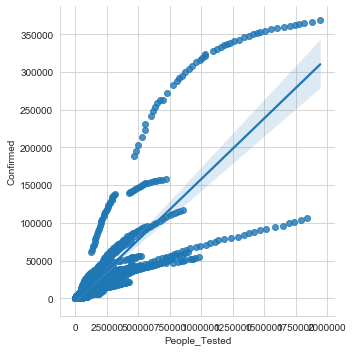

In [36]:
# we're trying to test the correlation beteween tests and deaths 
sns.set_style("whitegrid")
sns.lmplot('People_Tested', 'Confirmed', data = df)
plt.show()

In [45]:
# plot deaths, confirmed, peopel tested and recovered 

df['Day'] = pd.to_datetime(df['Last_Update']).dt.day

status = df.groupby(['Day'])['Confirmed', 'Deaths', 'Recovered', 'People_Tested'].sum()
status.head()

C:\Users\Hacha\miniconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Confirmed,Deaths,Recovered,People_Tested
Day,,,,
1.0,1069424,62996,153947.0,6231182.0
2.0,1103461,64943,164015.0,6551810.0
3.0,1132539,66369,175382.0,6816347.0
4.0,1158040,67682,180152.0,7053366.0
5.0,1180375,68922,187180.0,7285178.0


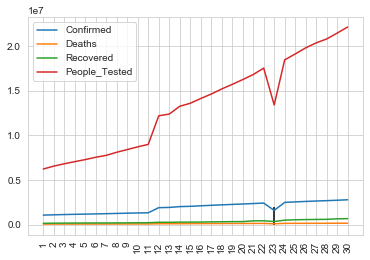

In [57]:
# plot this data 

days = [day for day, value in df.groupby(['Day'])]

for element in status:
        plt.plot(days, status[element], label = element)
plt.xticks(days, rotation = 'vertical')
plt.vlines(x = 23, ymin = 0, ymax = df['People_Tested'].max())
plt.legend()
plt.show()

In [67]:
# let's see why Donlad Trump said "Ask China!!!!"

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world['continent'] != 'Antarctica']

No handles with labels found to put in legend.


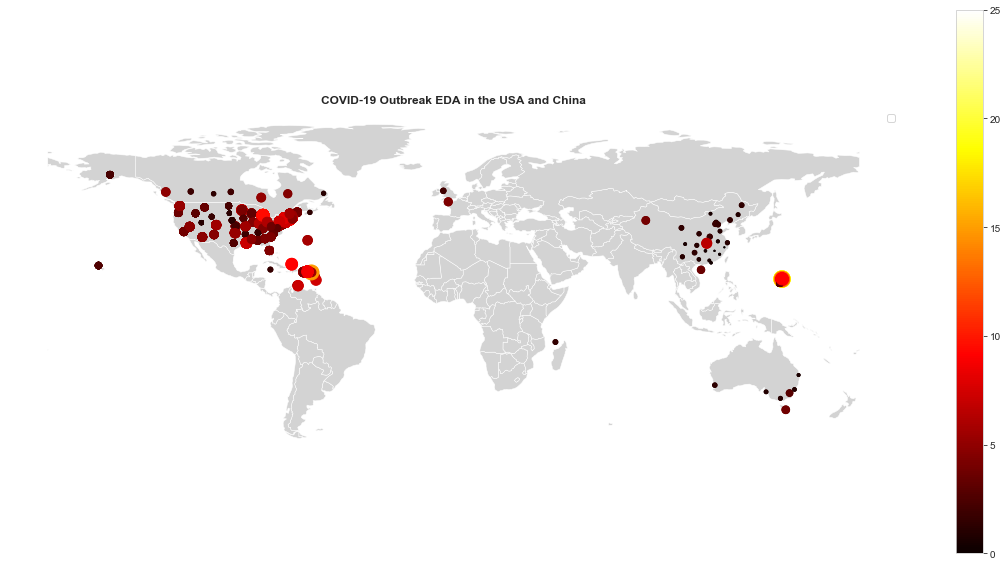

In [87]:
# plotting the world map with Deaths rates to explore why Donald Trump had said "Ask China!!!"

fig, ax = plt.subplots(figsize = (20,10))
world.plot(color = 'lightgray', ax=ax, linewidth = 0.5, edgecolor = 'w') # ploted the world map 
df.plot(column = 'Mortality_Rate', ax = ax, markersize = df['Mortality_Rate']*15, cmap = 'hot', legend = True)
plt.title('COVID-19 Outbreak EDA in the USA and China', fontweight = 'bold')
plt.legend()
ax.axis('off')
plt.show()